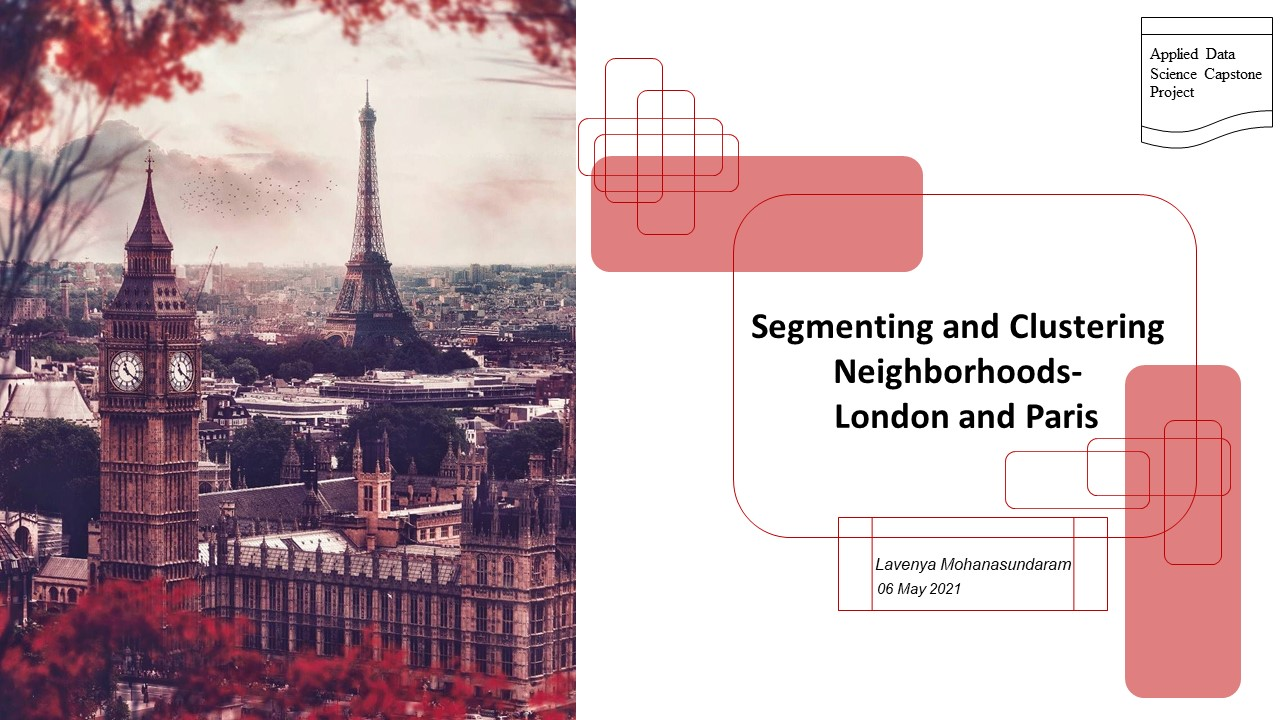

# Introduction

London is a leading global city. London is the capital of England and the United Kingdom; it is also the largest city within the country. It exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. London has a diverse range of people and cultures, and more than 300 languages are spoken in the region. The London metropolitan area is the third-most populous in Europe, after Istanbul and the Moscow Metropolitan Area, with 14,040,163 inhabitants in 2016.

Paris is the capital and most populous city of France, located in the north-central part of the nation. Since the 17th century, Paris has been one of Europe's major centers of finance, diplomacy, commerce, fashion, gastronomy, science and arts. The City of Paris is part of Île-de-France region, and it is considered as one of economic centers in Europe. It is multicultural city and provides many business opportunities. It was ranked as the second most visited travel destination in the world in 2019, after Bangkok and just ahead of London.

Both London and Paris are found at the heart of two great European nations. London and Paris are quite the popular tourist and vacation destinations for people all around the world. They are diverse and multicultural and offer a wide variety of experiences that is widely sought after. 

This project can be useful for those who moves to these cities, to find a good area to build and grow prosperously. In order to get a very good location details that meet this need, the London and Paris are explored through clustering and segmentation based on the London and Paris Post code and proximity to supplies. We try to group the neighborhoods of London and Paris respectively and draw insights to what they look like now.


# Business Problem

Besides the two being great cities, each of them has their unique winning points as compared to the other. So, if you are planning to embark on a trip or change your residence, and can’t quite choose between the two, don’t get all stressed up. The aim of this project is to help people to choose their destinations depending on the experiences that the neighborhoods have to offer and what they would want to have. The goal is to help stakeholders and globetrotters to make informed decisions and address any concerns they have including the different kinds of cuisines, provision stores and what the city has to offer.

## Target Audience

The purpose of this project is to help people in exploring better facilities around their neighborhoods. It will help people making smart and efficient decision on selecting great neighborhoods out number of other postal area in both the cites London and Paris. Lots of people are migrating from various cities and needed lots of research for good housing prices, new business and reputed professional places for their children. The tourists can plan accordingly by choosing the neighborhoods in both cities.This project is for those people who are looking for better neighborhoods and businesses. It will help people to get the awareness of area and neighborhood before visiting these big cities.


# Data Acquisition

This project will rely on geolocation data for both London and Paris. Postal codes in each city serve as a starting point. Using Postal codes, we use can find out the neighborhoods, boroughs, venues and their most popular venue categories.

For this project we need the following data:

## *London*
To derive our solution, we scrape our data from web source
Data Source : https://en.wikipedia.org/wiki/List_of_areas_of_London
This Wikipedia page has information about all the neighborhoods, we limit it London.
    
    1.borough: Name of Neighborhood 
    2.town: Name of borough 
    3.post_code: Postal codes for London.


This Wikipedia page lacks information about the geographical locations. To solve this problem, we use ArcGIS API.

## *Paris*
To derive our solution, we leverage JSON data available from web source
Data Source : https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e 
The JSON file has data about all the neighborhoods in France, we limit it to Paris.

    1.postal_code: Postal codes for France 
    2.nom_comm: Name of Neighborhoods in France 
    3.nom_dept: Name of the boroughs, equivalent to towns in France 
    4.geo_point_2d: Tuple containing the latitude and longitude of the Neighborhoods. 

## Infrastructures Description 

Different kinds of infrastructures in each neighborhood in London and Paris

Data Source: 
*	ArcGIS API
*	Foursquare API 

#### ArcGIS API
ArcGIS Online enables you to connect people, locations, and data using interactive maps. Work with smart, data-driven styles and intuitive analysis tools that deliver location intelligence. Share your insights with the world or specific groups.
More specifically, we use ArcGIS to get the geo locations of the neighborhoods of London. The following columns are added to our initial dataset which prepares our data.
    1.latitude: Latitude for Neighborhood
    2.longitude: Longitude for Neighborhood

#### Foursquare API 

Venue Data:
The venue data has been extracted using the Foursquare API. This data contains
venue recommendations for all neighborhoods in London and Paris; it is used to study the popular venues of different neighborhoods as well as build the unsupervised learning model to cluster neighborhoods.

We will need data about different venues in different neighborhoods of that specific borough. In order to gain that information, we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.
After finding the list of neighborhoods, we then connect to the Foursquare API to gather information about venues inside every neighborhood. For each neighborhood, we have chosen the radius to be 500 meters.
The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:
   
    1.Neighborhood: Name of the Neighborhood
    2.Neighborhood Latitude: Latitude of the Neighborhood
    3.Neighborhood Longitude: Longitude of the Neighborhood
    4.Venue: Name of the Venue
    5.Venue Latitude: Latitude of Venue
    6.Venue Longitude: Longitude of Venue
    7.Venue Category: Category of Venue

Using this data collected for both London and Paris will allow exploration and examination to build our model. This is a project that will make use of many data science skills, from web scraping, working with API (ArcGIS and Foursquare), data cleaning, data wrangling and map visualization (Folium), Exploratory Data Analysis to perform unsupervised Machine Learning using K-means clustering and Natural Language Processing using word cloud.




# Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
import sys
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install folium

print('Packages installed.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Packages installed.


In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# import k-means for the clustering stage
from sklearn.cluster import KMeans

The approach taken here is to explore each of the cities individually, plot the map to show the neighbourhoods being considered and then build our model by clustering all of the similar neighbourhoods together and finally plot the new map with the clustered neighbourhoods. We draw insights and then compare and discuss our findings.

# Exploring London
## Neighbourhoods of London

We begin to start collecting and refining the data needed for the our business solution to work.

### Data Collection
To get the neighbourhoods in london, we start by scraping the list of areas of london wiki page.

In [3]:
url_london = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
wiki_london_url = requests.get(url_london)
wiki_london_url

<Response [200]>

In [4]:
wiki_london_data = pd.read_html(wiki_london_url.text)
wiki_london_data

[                                                   0
 0  Map all coordinates in "Category:Areas of Lond...
 1                       Download coordinates as: KML,
             Location                     London borough       Post town  \
 0         Abbey Wood              Bexley, Greenwich [7]          LONDON   
 1              Acton  Ealing, Hammersmith and Fulham[8]          LONDON   
 2          Addington                         Croydon[8]         CROYDON   
 3         Addiscombe                         Croydon[8]         CROYDON   
 4        Albany Park                             Bexley  BEXLEY, SIDCUP   
 ..               ...                                ...             ...   
 526         Woolwich                          Greenwich          LONDON   
 527   Worcester Park       Sutton, Kingston upon Thames  WORCESTER PARK   
 528  Wormwood Scrubs             Hammersmith and Fulham          LONDON   
 529          Yeading                         Hillingdon           HAYES   
 

Scraping the webpage gives us all the tables present on the page. We need the 2nd table, so selecting the 2nd table.

In [5]:
wiki_london_data = wiki_london_data[1]
wiki_london_data

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
526,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
527,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
528,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
529,Yeading,Hillingdon,HAYES,UB4,020,TQ115825



## Data Preprocessing
we remove the spaces in the column titles and then we add _ between words.

In [6]:
wiki_london_data.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
wiki_london_data

,Location,London borough,Post_town,Postcode district,Dial code,OS_grid_ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
526,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
527,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
528,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
529,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


We see that few columns have no '_' between the words despite applying our function meaning that there are special characters

## Feature Selection
We need only the boroughs, Postal codes, Post town for further steps. We can drop the locations, dial codes and OS grid.

In [7]:
df1 = wiki_london_data.drop( [ wiki_london_data.columns[0], wiki_london_data.columns[4], wiki_london_data.columns[5] ], axis=1)

In [8]:
df1.head()

,London borough,Post_town,Postcode district
0,"Bexley, Greenwich [7]",LONDON,SE2
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Croydon[8],CROYDON,CR0
3,Croydon[8],CROYDON,CR0
4,Bexley,"BEXLEY, SIDCUP","DA5, DA14"


let's rename the Postcode district column and the london borough to something simpler

In [9]:
df1.columns = ['borough','town','post_code']
df1

,borough,town,post_code
0,"Bexley, Greenwich [7]",LONDON,SE2
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Croydon[8],CROYDON,CR0
3,Croydon[8],CROYDON,CR0
4,Bexley,"BEXLEY, SIDCUP","DA5, DA14"
...,...,...,...
526,Greenwich,LONDON,SE18
527,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4
528,Hammersmith and Fulham,LONDON,W12
529,Hillingdon,HAYES,UB4



Let's remove the Square brackets [ ] and numbers from the borough column

In [10]:
df1['borough'] = df1['borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))
df1

,borough,town,post_code
0,"Bexley, Greenwich",LONDON,SE2
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4"
2,Croydon,CROYDON,CR0
3,Croydon,CROYDON,CR0
4,Bexley,"BEXLEY, SIDCUP","DA5, DA14"
...,...,...,...
526,Greenwich,LONDON,SE18
527,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4
528,Hammersmith and Fulham,LONDON,W12
529,Hillingdon,HAYES,UB4


In [11]:
#Take the dimension of the dataframe

df1.shape

(531, 3)


We have currently 531 records and 3 columns of our data. It's time to perform Feature Engineering

## Feature Engineering
We can only focusing on the neighbourhoods of London, so performing the changes

In [12]:
df1 = df1[df1['town'].str.contains('LONDON')]
df1

,borough,town,post_code
0,"Bexley, Greenwich",LONDON,SE2
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4"
6,City,LONDON,EC3
7,Westminster,LONDON,WC2
9,Bromley,LONDON,SE20
...,...,...,...
521,Redbridge,LONDON,"IG8, E18"
522,"Redbridge, Waltham Forest","LONDON, WOODFORD GREEN",IG8
525,Barnet,LONDON,N12
526,Greenwich,LONDON,SE18



We now have only 308 rows. We can proceed with our further steps. Getting some descriptive statistics

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 528
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   borough    308 non-null    object
 1   town       308 non-null    object
 2   post_code  308 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


# Geolocations of the London Neighbourhoods
## ArcGis API
We need to get the geographical co-ordinates for the neighbourhoods to plot out map. We will use the arcgis package to do so.

Arcgis doesn't have a limitation on the number of API calls made so it fits our use case perfectly.

In [14]:
pip install arcgis

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [15]:
from arcgis.geocoding import geocode
from arcgis.gis import GIS
gis = GIS()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


Defining London arcgis geocode function to return latitude and longitude

In [16]:
def get_x_y_uk(address1):
   lat_coords = 0
   lng_coords = 0
   g = geocode(address='{}, London, England, GBR'.format(address1))[0]
   lng_coords = g['location']['x']
   lat_coords = g['location']['y']
   return str(lat_coords) +","+ str(lng_coords)

Checking sample data

In [17]:
c = get_x_y_uk('SE2')

In [18]:
c

'51.499741450000045,0.12406135200006929'

Looks good, We Copy over the postal codes of london to pass it into the geolocator function that we just defined above

In [19]:
geo_coordinates_uk = df1['post_code']    
geo_coordinates_uk

0           SE2
1        W3, W4
6           EC3
7           WC2
9          SE20
         ...   
521    IG8, E18
522         IG8
525         N12
526        SE18
528         W12
Name: post_code, Length: 308, dtype: object

Passing postal codes of london to get the geographical co-ordinates

In [20]:
coordinates_latlng_uk = geo_coordinates_uk.apply(lambda x: get_x_y_uk(x))
coordinates_latlng_uk

0       51.499741450000045,0.12406135200006929
1        51.49776500000007,-0.2558519459999502
6      51.513145000000065,-0.07873298599997725
7       51.51462500000008,-0.11486033199997792
9        51.48249000000004,0.11919361600007505
                        ...                   
521     51.51180000000005,-0.07129021599996577
522    51.507408360000056,-0.12769869299995662
525    51.542635000000075,-0.09858089899995548
526     51.50312900000006,-0.10802518599996347
528    51.515085000000056,-0.24269643599996016
Name: post_code, Length: 308, dtype: object

## Latitude
Extracting the latitude from our previously collected coordinates

In [21]:
lat_uk = coordinates_latlng_uk.apply(lambda x: x.split(',')[0])
lat_uk

0      51.499741450000045
1       51.49776500000007
6      51.513145000000065
7       51.51462500000008
9       51.48249000000004
              ...        
521     51.51180000000005
522    51.507408360000056
525    51.542635000000075
526     51.50312900000006
528    51.515085000000056
Name: post_code, Length: 308, dtype: object

## Longitude
Extracting the Longitude from our previously collected coordinates

In [22]:
lng_uk = coordinates_latlng_uk.apply(lambda x: x.split(',')[1])
lng_uk

0       0.12406135200006929
1       -0.2558519459999502
6      -0.07873298599997725
7      -0.11486033199997792
9       0.11919361600007505
               ...         
521    -0.07129021599996577
522    -0.12769869299995662
525    -0.09858089899995548
526    -0.10802518599996347
528    -0.24269643599996016
Name: post_code, Length: 308, dtype: object

We now have the geographical co-ordinates of the London Neighbourhoods.

We proceed with Merging our source data with the geographical co-ordinates to make our dataset ready for the next stage

In [23]:
london_merged = pd.concat([df1,lat_uk.astype(float), lng_uk.astype(float)], axis=1)
london_merged.columns= ['borough','town','post_code','latitude','longitude']
london_merged

,borough,town,post_code,latitude,longitude
0,"Bexley, Greenwich",LONDON,SE2,51.499741,0.124061
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.497765,-0.255852
6,City,LONDON,EC3,51.513145,-0.078733
7,Westminster,LONDON,WC2,51.514625,-0.114860
9,Bromley,LONDON,SE20,51.482490,0.119194
...,...,...,...,...,...
521,Redbridge,LONDON,"IG8, E18",51.511800,-0.071290
522,"Redbridge, Waltham Forest","LONDON, WOODFORD GREEN",IG8,51.507408,-0.127699
525,Barnet,LONDON,N12,51.542635,-0.098581
526,Greenwich,LONDON,SE18,51.503129,-0.108025


In [24]:
london_merged.dtypes

borough       object
town          object
post_code     object
latitude     float64
longitude    float64
dtype: object

##  Co-ordinates for London
Getting the geocode for London to help visualize it on the map

In [25]:
london = geocode(address='London, England, GBR')[0]
london_lng_coords = london['location']['x']
london_lat_coords = london['location']['y']
london_lng_coords

-0.12769869299995662

In [26]:
london_lat_coords

51.507408360000056

# Visualize the Map of London
To help visualize the Map of London and the neighbourhoods in London, we make use of the folium package.

In [27]:
# Creating the map of London
map_London = folium.Map(location=[london_lat_coords, london_lng_coords], zoom_start=12)
map_London

# adding markers to map
for latitude, longitude, borough, town in zip(london_merged['latitude'], london_merged['longitude'], london_merged['borough'], london_merged['town']):
    label = '{}, {}'.format(town, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_London)  
    
map_London

# Foursquare API
## Venues in London
To proceed with the next part, we need to define Foursquare API credentials.

Using Foursquare API, we are able to get the venue and venue categories around each neighbourhood in London.

In [28]:
CLIENT_ID = 'RSSP035MSTNJBMDPU0YKZZP5L2GCR0MC15JR4NCNOCD2VMFY' 
CLIENT_SECRET = '1ACSE0RNEKEDRQ5L11V53VY422QE3RUS2K4LT5JKIALWEELZ'
VERSION = '20180605' # Foursquare API version

Defining a function to get the neraby venues in the neighbourhood. This will help us get venue categories which is important for our analysis

In [29]:
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Getting the venues in London

In [30]:
venues_in_London = getNearbyVenues(london_merged['borough'], london_merged['latitude'], london_merged['longitude'])

Bexley, Greenwich 
Ealing, Hammersmith and Fulham
City
Westminster
Bromley
Islington
Islington
Barnet
Enfield
Wandsworth
Southwark
City
Richmond upon Thames
Barnet
Islington
Wandsworth
Westminster
Bromley
Newham
Ealing
Westminster
Lewisham
Camden
Southwark
Tower Hamlets
Bexley
City
Lewisham
Greenwich
Tower Hamlets
Camden
Haringey
Tower Hamlets
Haringey
Barnet
Brent
Lambeth
Lewisham
Tower Hamlets
Kensington and Chelsea, Hammersmith and Fulham
Brent
Barnet
Barnet
Southwark
Tower Hamlets
Camden
Tower Hamlets
Waltham Forest
Newham
Islington
Richmond upon Thames
Lewisham
Camden
Westminster
Greenwich
Kensington and Chelsea
Barnet
Westminster
Lewisham
Waltham Forest
Hounslow, Ealing, Hammersmith and Fulham
Brent
Barnet
Lambeth, Wandsworth
Islington
Barnet
Merton
Barnet
Westminster
Barnet, Brent, Camden
Lewisham
Bexley
Haringey
Bromley
Tower Hamlets
Newham
Hackney
Islington
Southwark
Lewisham
Brent
Southwark
Ealing
Kensington and Chelsea
Wandsworth
Southwark
Barnet
Newham
Richmond upon Thames


Sampling our data

In [31]:
venues_in_London.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,"Bexley, Greenwich",51.499741,0.124061,Southmere Lake,Lake
1,"Ealing, Hammersmith and Fulham",51.497765,-0.255852,Lara Restaurant,Mediterranean Restaurant
2,"Ealing, Hammersmith and Fulham",51.497765,-0.255852,Hack & Veldt,Coffee Shop
3,"Ealing, Hammersmith and Fulham",51.497765,-0.255852,Good Boy Coffee,Coffee Shop
4,"Ealing, Hammersmith and Fulham",51.497765,-0.255852,Chief Coffee,Coffee Shop


In [32]:
venues_in_London.shape

(12335, 5)

Great, we have scraped together 12299 records for venues in London. This will definitely make the clustering interesting.

## Grouping by Venue Categories
We need to now see how many Venue Categories are there for further processing

In [33]:
venues_in_London.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
Accessories Store,"Camden, Islington",51.517165,-0.126810,James Smith & Sons
Adult Boutique,Hackney,51.529675,-0.083470,Sh! Women's Erotic Emporium
Afghan Restaurant,Enfield,51.535185,-0.100543,Afghan Kitchen
African Restaurant,Westminster,51.586805,-0.065515,Le Chamarel
American Restaurant,Westminster,51.515390,0.029115,When Mac Met Cheese
...,...,...,...,...
Wine Shop,Westminster,51.553177,-0.061776,Wine Pantry
Winery,Lambeth,51.463370,-0.115820,The Wine Parlour
Wings Joint,Newham,51.519895,-0.075422,The Orange Buffalo


We can see 322 records, just goes to show how diverse and interesting the place is.

## One Hot Encoding
We need to Encode our venue categories to get a better result for our clustering

In [34]:
London_venue_cat = pd.get_dummies(venues_in_London[['Venue Category']], prefix="", prefix_sep="")
London_venue_cat

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding Neighbourhood into the mix.

In [35]:
London_venue_cat['Neighbourhood'] = venues_in_London['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [London_venue_cat.columns[-1]] + list(London_venue_cat.columns[:-1])
London_venue_cat = London_venue_cat[fixed_columns]

London_venue_cat.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Ealing, Hammersmith and Fulham",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Ealing, Hammersmith and Fulham",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Ealing, Hammersmith and Fulham",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Ealing, Hammersmith and Fulham",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Venue categories mean value
We will group the Neighbourhoods and calculate the mean venue categories value in each Neighbourhood

In [36]:
London_grouped = London_venue_cat.groupby('Neighbourhood').mean().reset_index()
London_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Barnet,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.013725,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Barnet, Brent, Camden",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.009709,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.029126,0.0,0.0,0.0,0.0,0.0
3,"Bexley, Greenwich",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bexley, Greenwich",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Let's make a function to get the top most common venue categories

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

There are way too many venue categories, we can take the top 10 to cluster the neighbourhoods.

Creating a function to label the columns of the venue correctly

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

## Top venue categories
Getting the top venue categories in London

In [39]:
# create a new dataframe for London
neighborhoods_venues_sorted_london = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_london['Neighbourhood'] = London_grouped['Neighbourhood']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted_london.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_london.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Pub,Coffee Shop,Park,Café,Bakery,Gastropub,Cocktail Bar,Bus Stop,Indian Restaurant,Train Station
1,"Barnet, Brent, Camden",Pizza Place,Furniture / Home Store,Park,Yoga Studio,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
2,Bexley,Hotel,Theater,Monument / Landmark,Pub,Plaza,Bakery,Ice Cream Shop,Japanese Restaurant,Lake,Wine Bar
3,"Bexley, Greenwich",Indian Restaurant,Construction & Landscaping,Grocery Store,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
4,"Bexley, Greenwich",Lake,Yoga Studio,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


# Model Building

## K Means Clustering  - Unsupervised Learning

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

We use K-means unsupervised learning technique was used to cluster the neighborhoods based on the category of venues near the neighborhoods. One important aspect of the k-means model is to determine the number of clusters to use in model development.

Let's cluster the city of london to roughly 5 to make it easier to analyze.


In [40]:
# set number of clusters
k_num_clusters = 5

London_grouped_clustering = London_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_london = KMeans(n_clusters=k_num_clusters, random_state=0).fit(London_grouped_clustering)
kmeans_london

KMeans(n_clusters=5, random_state=0)

Labelling Clustered Data

In [41]:
kmeans_london.labels_

array([1, 0, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

So our model has labeled the city

In [42]:
neighborhoods_venues_sorted_london.insert(0, 'Cluster Labels', kmeans_london.labels_ +1)

Join London_merged with our neighbourhood venues sorted to add latitude & longitude for each of the neighborhood to prepare it for plotting

In [43]:
london_data = london_merged

london_data = london_data.join(neighborhoods_venues_sorted_london.set_index('Neighbourhood'), on='borough')

london_data.head()

,borough,town,post_code,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bexley, Greenwich",LONDON,SE2,51.499741,0.124061,3,Lake,Yoga Studio,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.497765,-0.255852,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
6,City,LONDON,EC3,51.513145,-0.078733,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Gym / Fitness Center,Wine Bar,Cocktail Bar,Restaurant,French Restaurant,Sandwich Place
7,Westminster,LONDON,WC2,51.514625,-0.114860,2,Hotel,Pub,Coffee Shop,Café,Restaurant,Sandwich Place,French Restaurant,Tea Room,Lounge,Art Gallery
9,Bromley,LONDON,SE20,51.482490,0.119194,2,Forest,Campground,Bus Stop,Athletics & Sports,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Park,Japanese Restaurant


Drop all the NaN values to prevent data skew

In [44]:
london_data_nonan = london_data.dropna(subset=['Cluster Labels'])

## Visualizing the clustered neighbourhood
Let's plot the clusters

In [45]:
map_clusters_london = folium.Map(location=[london_lat_coords, london_lng_coords], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_data_nonan['latitude'], london_data_nonan['longitude'], london_data_nonan['borough'], london_data_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters_london)
        
map_clusters_london

## Examining our Clusters
### Cluster 1

In [46]:
london_data_nonan.loc[london_data_nonan['Cluster Labels'] == 1, london_data_nonan.columns[[1] + list(range(5, london_data_nonan.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
121,LONDON,1,Pizza Place,Furniture / Home Store,Park,Yoga Studio,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm


### Cluster 2

In [47]:
london_data_nonan.loc[london_data_nonan['Cluster Labels'] == 2, london_data_nonan.columns[[1] + list(range(5, london_data_nonan.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,LONDON,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Gym / Fitness Center,Wine Bar,Cocktail Bar,Restaurant,French Restaurant,Sandwich Place
7,LONDON,2,Hotel,Pub,Coffee Shop,Café,Restaurant,Sandwich Place,French Restaurant,Tea Room,Lounge,Art Gallery
9,LONDON,2,Forest,Campground,Bus Stop,Athletics & Sports,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Park,Japanese Restaurant
10,LONDON,2,Pub,Café,Coffee Shop,Bar,Cocktail Bar,Sandwich Place,Thai Restaurant,Bus Stop,Grocery Store,Indian Restaurant
12,LONDON,2,Pub,Café,Coffee Shop,Bar,Cocktail Bar,Sandwich Place,Thai Restaurant,Bus Stop,Grocery Store,Indian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
521,LONDON,2,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Sandwich Place,Gym / Fitness Center,Bar,Korean Restaurant
522,"LONDON, WOODFORD GREEN",2,Hotel,Coffee Shop,Pub,Indian Restaurant,Café,Sandwich Place,Monument / Landmark,Theater,Art Gallery,Cocktail Bar
525,LONDON,2,Pub,Coffee Shop,Park,Café,Bakery,Gastropub,Cocktail Bar,Bus Stop,Indian Restaurant,Train Station
526,LONDON,2,Pub,Coffee Shop,Bar,Hotel,Gym / Fitness Center,Café,Italian Restaurant,Bakery,Grocery Store,Thai Restaurant


### Cluster 3

In [48]:
london_data_nonan.loc[london_data_nonan['Cluster Labels'] == 3, london_data_nonan.columns[[1] + list(range(5, london_data_nonan.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LONDON,3,Lake,Yoga Studio,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


### Cluster 4

In [49]:
london_data_nonan.loc[london_data_nonan['Cluster Labels'] == 4, london_data_nonan.columns[[1] + list(range(5, london_data_nonan.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
167,"LONDON, WELLING",4,Indian Restaurant,Construction & Landscaping,Grocery Store,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
457,"LONDON, ERITH",4,Indian Restaurant,Construction & Landscaping,Grocery Store,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm


### Cluster 5

In [50]:
london_data_nonan.loc[london_data_nonan['Cluster Labels'] == 5, london_data_nonan.columns[[1] + list(range(5, london_data_nonan.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,LONDON,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
34,LONDON,5,Park,Train Station,Coffee Shop,Tennis Court,Fast Food Restaurant,Bus Stop,Grocery Store,Playground,Comedy Club,Café
99,LONDON,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
141,LONDON,5,Park,Train Station,Coffee Shop,Tennis Court,Fast Food Restaurant,Bus Stop,Grocery Store,Playground,Comedy Club,Café
196,LONDON,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
198,LONDON,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
214,LONDON,5,Park,Train Station,Coffee Shop,Tennis Court,Fast Food Restaurant,Bus Stop,Grocery Store,Playground,Comedy Club,Café
452,LONDON,5,Café,Coffee Shop,Park,Portuguese Restaurant,Grocery Store,Gym / Fitness Center,Japanese Restaurant,Pharmacy,Falafel Restaurant,Escape Room
453,LONDON,5,Café,Coffee Shop,Park,Portuguese Restaurant,Grocery Store,Gym / Fitness Center,Japanese Restaurant,Pharmacy,Falafel Restaurant,Escape Room
499,LONDON,5,Park,Train Station,Coffee Shop,Tennis Court,Fast Food Restaurant,Bus Stop,Grocery Store,Playground,Comedy Club,Café


## Build Word cloud for the 1st Most Common Venue in London

We will build a word cloud for each 1st Most Common Venue in London to discover dominant Venues

Packaage Installaton

In [51]:
!pip install wordcloud
!pip install matplotlib

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [52]:
#Library to form wordcloud :
from wordcloud import WordCloud, STOPWORDS 
 
import pandas as pd 

#Library to plot the wordcloud :
import matplotlib.pyplot as plt


In [53]:
# Viewing data for London
london_data.head()

,borough,town,post_code,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bexley, Greenwich",LONDON,SE2,51.499741,0.124061,3,Lake,Yoga Studio,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.497765,-0.255852,5,Coffee Shop,Bus Stop,Grocery Store,Park,Argentinian Restaurant,Mediterranean Restaurant,French Restaurant,Comedy Club,Health Food Store,Café
6,City,LONDON,EC3,51.513145,-0.078733,2,Coffee Shop,Hotel,Pub,Italian Restaurant,Gym / Fitness Center,Wine Bar,Cocktail Bar,Restaurant,French Restaurant,Sandwich Place
7,Westminster,LONDON,WC2,51.514625,-0.114860,2,Hotel,Pub,Coffee Shop,Café,Restaurant,Sandwich Place,French Restaurant,Tea Room,Lounge,Art Gallery
9,Bromley,LONDON,SE20,51.482490,0.119194,2,Forest,Campground,Bus Stop,Athletics & Sports,Café,Coffee Shop,Gym / Fitness Center,Grocery Store,Park,Japanese Restaurant


In [54]:
london_comvenue = london_data[['1st Most Common Venue']]

In [55]:
london_comvenue.to_csv('london_comvenue.txt',sep=',',index = False)

In [56]:
london_comvenue1 = open('london_comvenue.txt','r').read()

In [57]:
#Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.
stopwords = set(STOPWORDS)

In [58]:
# instantiate a word cloud object
London_Venues = WordCloud(max_font_size=100, 
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
London_Venues.generate(london_comvenue1)

The wordcloud was created, let's visualize it.

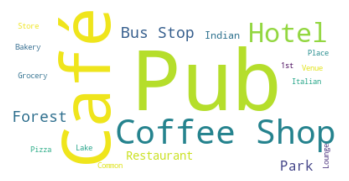

<Figure size 7200x7200 with 0 Axes>

In [59]:
# display the word cloud
plt.imshow(London_Venues, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(100)

plt.show()

The three most common venue in London are:

    1.Pub
    2.Cafe'
    3.Coffee Shop

# Exploring Paris

## Neighbourhoods of Paris

### Data Collection

We read the json data with pandas.

In [60]:
!wget -q -O 'france-data.json' https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e
print("Data Downloaded!")

Data Downloaded!


In [61]:
paris_raw = pd.read_json('france-data.json')
paris_raw.head()

,datasetid,recordid,fields,geometry,record_timestamp
0,correspondances-code-insee-code-postal,2bf36b38314b6c39dfbcd09225f97fa532b1fc45,"{'code_comm': '645', 'nom_dept': 'ESSONNE', 's...","{'type': 'Point', 'coordinates': [2.2517129721...",2016-09-21T00:29:06.175+02:00
1,correspondances-code-insee-code-postal,7ee82e74e059b443df18bb79fc5a19b1f05e5a88,"{'code_comm': '133', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [3.0529405055...",2016-09-21T00:29:06.175+02:00
2,correspondances-code-insee-code-postal,e2cd3186f07286705ed482a10b6aebd9de633c81,"{'code_comm': '378', 'nom_dept': 'ESSONNE', 's...","{'type': 'Point', 'coordinates': [2.1971816504...",2016-09-21T00:29:06.175+02:00
3,correspondances-code-insee-code-postal,868bf03527a1d0a9defe5cf4e6fa0a730d725699,"{'code_comm': '243', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [2.7097808131...",2016-09-21T00:29:06.175+02:00
4,correspondances-code-insee-code-postal,1bbcee92101fdb50f5f5fceb052681f2421ff961,"{'code_comm': '414', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [3.2582355268...",2016-09-21T00:29:06.175+02:00


## Data Preprocessing

We break down each of the nested fields and create the dataframe that we need

In [62]:
paris_field_data = pd.DataFrame()
for f in paris_raw.fields:
    dict_new = f
    paris_field_data = paris_field_data.append(dict_new, ignore_index=True)

paris_field_data.head()

,code_arr,code_cant,code_comm,code_dept,code_reg,geo_point_2d,geo_shape,id_geofla,insee_com,nom_comm,nom_dept,nom_region,population,postal_code,statut,superficie,z_moyen
0,3,03,645,91,11,"[48.750443119964764, 2.251712972144151]","{'type': 'Polygon', 'coordinates': [[[2.238024...",16275,91645,VERRIERES-LE-BUISSON,ESSONNE,ILE-DE-FRANCE,15.5,91370,Commune simple,999.0,121.0
1,3,20,133,77,11,"[48.41256065214989, 3.052940505560729]","{'type': 'Polygon', 'coordinates': [[[3.076046...",31428,77133,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,ILE-DE-FRANCE,0.2,77126,Commune simple,1082.0,88.0
2,1,09,378,91,11,"[48.52726809075556, 2.19718165044305]","{'type': 'Polygon', 'coordinates': [[[2.203466...",30975,91378,MAUCHAMPS,ESSONNE,ILE-DE-FRANCE,0.3,91730,Commune simple,313.0,150.0
3,5,14,243,77,11,"[48.87307018579678, 2.7097808131278462]","{'type': 'Polygon', 'coordinates': [[[2.727542...",17000,77243,LAGNY-SUR-MARNE,SEINE-ET-MARNE,ILE-DE-FRANCE,20.2,77400,Chef-lieu canton,579.0,71.0
4,3,25,414,77,11,"[48.62891464105825, 3.2582355268439223]","{'type': 'Polygon', 'coordinates': [[[3.294591...",34949,77414,SAINT-HILLIERS,SEINE-ET-MARNE,ILE-DE-FRANCE,0.4,77160,Commune simple,1907.0,158.0


## Feature Selection

We take the columns that we require, in case of paris it would be the geo_point_2d, nom_dept, nom_comm and postal_code

In [63]:
df_2 = paris_field_data[['postal_code','nom_comm','nom_dept','geo_point_2d']]
df_2

,postal_code,nom_comm,nom_dept,geo_point_2d
0,91370,VERRIERES-LE-BUISSON,ESSONNE,"[48.750443119964764, 2.251712972144151]"
1,77126,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,"[48.41256065214989, 3.052940505560729]"
2,91730,MAUCHAMPS,ESSONNE,"[48.52726809075556, 2.19718165044305]"
3,77400,LAGNY-SUR-MARNE,SEINE-ET-MARNE,"[48.87307018579678, 2.7097808131278462]"
4,77160,SAINT-HILLIERS,SEINE-ET-MARNE,"[48.62891464105825, 3.2582355268439223]"
...,...,...,...,...
1295,77520,CESSOY-EN-MONTOIS,SEINE-ET-MARNE,"[48.50730730461658, 3.138844194183689]"
1296,93420,VILLEPINTE,SEINE-SAINT-DENIS,"[48.95902025378707, 2.536306342059409]"
1297,77130,CANNES-ECLUSE,SEINE-ET-MARNE,"[48.36403767307805, 2.990786679832767]"
1298,78930,VILLETTE,YVELINES,"[48.92627887061508, 1.6937417245662671]"


In [64]:
df_paris = df_2[df_2['nom_dept'].str.contains('PARIS')].reset_index(drop=True)
df_paris

,postal_code,nom_comm,nom_dept,geo_point_2d
0,75009,PARIS-9E-ARRONDISSEMENT,PARIS,"[48.87689616237872, 2.337460241388529]"
1,75002,PARIS-2E-ARRONDISSEMENT,PARIS,"[48.86790337886785, 2.344107166658533]"
2,75011,PARIS-11E-ARRONDISSEMENT,PARIS,"[48.85941549762748, 2.378741060237548]"
3,75008,PARIS-8E-ARRONDISSEMENT,PARIS,"[48.87252726662346, 2.312582560420059]"
4,75013,PARIS-13E-ARRONDISSEMENT,PARIS,"[48.82871768452136, 2.362468228516128]"
5,75012,PARIS-12E-ARRONDISSEMENT,PARIS,"[48.83515623066034, 2.419807034965275]"
6,75003,PARIS-3E-ARRONDISSEMENT,PARIS,"[48.86305413181178, 2.359361058970589]"
7,75006,PARIS-6E-ARRONDISSEMENT,PARIS,"[48.84896809191946, 2.332670898588416]"
8,75004,PARIS-4E-ARRONDISSEMENT,PARIS,"[48.854228281954754, 2.357361938142205]"
9,75010,PARIS-10E-ARRONDISSEMENT,PARIS,"[48.87602855694339, 2.361112904561707]"


In [65]:
df_paris.shape

(20, 4)


We have managed to bring down the records to just 20 from 1300. Paris data is quite small than initally thought

In [66]:
df_paris.dtypes

postal_code     object
nom_comm        object
nom_dept        object
geo_point_2d    object
dtype: object

## Gelocations of the Neighbourhoods of Paris

We don't need to get the geo coordinates using an external data source or collect it with the arcgis API call since we already have it stored in the geo_point_2d column as a tuple in the df_paris dataframe.

Checking one of the geo coordinates.

In [67]:
df_paris['geo_point_2d'][0]

[48.87689616237872, 2.337460241388529]

In [68]:
temp1 = df_paris['geo_point_2d']
temp1

0      [48.87689616237872, 2.337460241388529]
1      [48.86790337886785, 2.344107166658533]
2      [48.85941549762748, 2.378741060237548]
3      [48.87252726662346, 2.312582560420059]
4      [48.82871768452136, 2.362468228516128]
5      [48.83515623066034, 2.419807034965275]
6      [48.86305413181178, 2.359361058970589]
7      [48.84896809191946, 2.332670898588416]
8     [48.854228281954754, 2.357361938142205]
9      [48.87602855694339, 2.361112904561707]
10     [48.86039876035177, 2.262099559395783]
11    [48.844508659617546, 2.349859385560182]
12     [48.88686862295828, 2.384694327870042]
13     [48.86318677744551, 2.400819826729021]
14     [48.85608259819694, 2.312438687733857]
15    [48.892735074561706, 2.348711933867703]
16     [48.88733716648682, 2.307485559493426]
17     [48.84015541860987, 2.293559372435076]
18      [48.8626304851685, 2.336293446550539]
19     [48.82899321160942, 2.327100883257538]
Name: geo_point_2d, dtype: object

In [69]:
paris_latlng = df_paris['geo_point_2d'].astype('str')

Spliting the geo_point_2d column into latitude and longitude.

## Latitude

In [70]:
paris_lat = paris_latlng.apply(lambda x: x.split(',')[0])
paris_lat = paris_lat.apply(lambda x: x.lstrip('['))
paris_lat

0      48.87689616237872
1      48.86790337886785
2      48.85941549762748
3      48.87252726662346
4      48.82871768452136
5      48.83515623066034
6      48.86305413181178
7      48.84896809191946
8     48.854228281954754
9      48.87602855694339
10     48.86039876035177
11    48.844508659617546
12     48.88686862295828
13     48.86318677744551
14     48.85608259819694
15    48.892735074561706
16     48.88733716648682
17     48.84015541860987
18      48.8626304851685
19     48.82899321160942
Name: geo_point_2d, dtype: object

## Longitude

In [71]:
paris_lng = paris_latlng.apply(lambda x: x.split(',')[1])
paris_lng = paris_lng.apply(lambda x: x.rstrip(']'))
paris_lng

0      2.337460241388529
1      2.344107166658533
2      2.378741060237548
3      2.312582560420059
4      2.362468228516128
5      2.419807034965275
6      2.359361058970589
7      2.332670898588416
8      2.357361938142205
9      2.361112904561707
10     2.262099559395783
11     2.349859385560182
12     2.384694327870042
13     2.400819826729021
14     2.312438687733857
15     2.348711933867703
16     2.307485559493426
17     2.293559372435076
18     2.336293446550539
19     2.327100883257538
Name: geo_point_2d, dtype: object

In [72]:
paris_geo_lat  = pd.DataFrame(paris_lat.astype(float))
paris_geo_lat.columns=['Latitude']
paris_geo_lng = pd.DataFrame(paris_lng.astype(float))
paris_geo_lng.columns=['Longitude']

Preparing our combined data by dropping the geo_point_2d column from our previously stored df_paris and concatenating with the latitude and longitude extracted from it

In [73]:
paris_combined_data = pd.concat([df_paris.drop('geo_point_2d', axis=1), paris_geo_lat, paris_geo_lng], axis=1)
paris_combined_data

,postal_code,nom_comm,nom_dept,Latitude,Longitude
0,75009,PARIS-9E-ARRONDISSEMENT,PARIS,48.876896,2.337460
1,75002,PARIS-2E-ARRONDISSEMENT,PARIS,48.867903,2.344107
2,75011,PARIS-11E-ARRONDISSEMENT,PARIS,48.859415,2.378741
3,75008,PARIS-8E-ARRONDISSEMENT,PARIS,48.872527,2.312583
4,75013,PARIS-13E-ARRONDISSEMENT,PARIS,48.828718,2.362468
5,75012,PARIS-12E-ARRONDISSEMENT,PARIS,48.835156,2.419807
6,75003,PARIS-3E-ARRONDISSEMENT,PARIS,48.863054,2.359361
7,75006,PARIS-6E-ARRONDISSEMENT,PARIS,48.848968,2.332671
8,75004,PARIS-4E-ARRONDISSEMENT,PARIS,48.854228,2.357362
9,75010,PARIS-10E-ARRONDISSEMENT,PARIS,48.876029,2.361113



### Co-ordinates for Paris

In [74]:
paris = geocode(address='Paris, France, FR')[0]
paris_lng_coords = paris['location']['x']
paris_lat_coords = paris['location']['y']
print("The geolocation of Paris: ", paris_lat_coords, paris_lng_coords)

The geolocation of Paris:  48.85341000000005 2.3488000000000397


## Visualize the Map of Paris

In [75]:
# Creating the map of Paris
map_Paris= folium.Map(location=[paris_lat_coords, paris_lng_coords], zoom_start=12)
map_Paris

# adding markers to map
for latitude, longitude, borough, town in zip(paris_combined_data['Latitude'], paris_combined_data['Longitude'], paris_combined_data['nom_comm'], paris_combined_data['nom_dept']):
    label = '{}, {}'.format(town, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='Blue',
        fill=True,
        fill_opacity=0.8
        ).add_to(map_Paris)  
    
map_Paris


## Venues in Paris

Using our previously defined function. Let's get the neaby venues present in each neighbourhood of Paris

In [76]:
venues_in_Paris = getNearbyVenues(paris_combined_data['nom_comm'], paris_combined_data['Latitude'], paris_combined_data['Longitude'])

PARIS-9E-ARRONDISSEMENT
PARIS-2E-ARRONDISSEMENT
PARIS-11E-ARRONDISSEMENT
PARIS-8E-ARRONDISSEMENT
PARIS-13E-ARRONDISSEMENT
PARIS-12E-ARRONDISSEMENT
PARIS-3E-ARRONDISSEMENT
PARIS-6E-ARRONDISSEMENT
PARIS-4E-ARRONDISSEMENT
PARIS-10E-ARRONDISSEMENT
PARIS-16E-ARRONDISSEMENT
PARIS-5E-ARRONDISSEMENT
PARIS-19E-ARRONDISSEMENT
PARIS-20E-ARRONDISSEMENT
PARIS-7E-ARRONDISSEMENT
PARIS-18E-ARRONDISSEMENT
PARIS-17E-ARRONDISSEMENT
PARIS-15E-ARRONDISSEMENT
PARIS-1ER-ARRONDISSEMENT
PARIS-14E-ARRONDISSEMENT


In [77]:
venues_in_Paris.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,PARIS-9E-ARRONDISSEMENT,48.876896,2.33746,Farine & O,Bakery
1,PARIS-9E-ARRONDISSEMENT,48.876896,2.33746,RAP,Gourmet Shop
2,PARIS-9E-ARRONDISSEMENT,48.876896,2.33746,Place Saint-Georges,Plaza
3,PARIS-9E-ARRONDISSEMENT,48.876896,2.33746,La Compagnie du Café,Café
4,PARIS-9E-ARRONDISSEMENT,48.876896,2.33746,Le Bouclier de Bacchus,Wine Bar


In [78]:
venues_in_Paris.shape

(1264, 5)

We have managed to collect 1324 venue records for the neighbourhoods in Paris

## Grouping by Venue Categories

We need to now see how many Venue Categories are there for further processing

In [79]:
venues_in_Paris.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
Afghan Restaurant,PARIS-11E-ARRONDISSEMENT,48.859415,2.378741,Afghanistan
African Restaurant,PARIS-9E-ARRONDISSEMENT,48.876896,2.361113,Wally Le Saharien
American Restaurant,PARIS-19E-ARRONDISSEMENT,48.892735,2.384694,Harper's
Antique Shop,PARIS-9E-ARRONDISSEMENT,48.876896,2.337460,Hôtel des Ventes Drouot
Argentinian Restaurant,PARIS-3E-ARRONDISSEMENT,48.863054,2.359361,Anahi
...,...,...,...,...
Wine Bar,PARIS-9E-ARRONDISSEMENT,48.892735,2.400820,Ô Château
Wine Shop,PARIS-3E-ARRONDISSEMENT,48.892735,2.361113,Trois Fois Vin
Women's Store,PARIS-2E-ARRONDISSEMENT,48.867903,2.344107,L'Appartement Sézane


## One Hot Encoding

We need to Encode our venue categories to get a better result for our clustering

In [80]:
Paris_venue_cat = pd.get_dummies(venues_in_Paris[['Venue Category']], prefix="", prefix_sep="")
Paris_venue_cat

,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding Neighbourhoods to our Data

In [81]:
Paris_venue_cat['Neighbourhood'] = venues_in_Paris['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [Paris_venue_cat.columns[-1]] + list(Paris_venue_cat.columns[:-1])
Paris_venue_cat = Paris_venue_cat[fixed_columns]

Paris_venue_cat.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,PARIS-9E-ARRONDISSEMENT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PARIS-9E-ARRONDISSEMENT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PARIS-9E-ARRONDISSEMENT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PARIS-9E-ARRONDISSEMENT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PARIS-9E-ARRONDISSEMENT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Venue categories mean value

We will group the Neighbourhoods and calculate the mean venue categories value in each Neighbourhood

In [82]:
Paris_grouped = Paris_venue_cat.groupby('Neighbourhood').mean().reset_index()
Paris_grouped.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,PARIS-10E-ARRONDISSEMENT,0.000000,0.02,0.0,0.0,0.0,0.0,0.000000,0.0,0.030000,...,0.0,0.0,0.010000,0.0,0.000000,0.020000,0.02,0.0,0.0,0.0
1,PARIS-11E-ARRONDISSEMENT,0.022727,0.00,0.0,0.0,0.0,0.0,0.022727,0.0,0.045455,...,0.0,0.0,0.022727,0.0,0.045455,0.022727,0.00,0.0,0.0,0.0
2,PARIS-12E-ARRONDISSEMENT,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.2,0.2
3,PARIS-13E-ARRONDISSEMENT,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,...,0.0,0.0,0.000000,0.0,0.216667,0.000000,0.00,0.0,0.0,0.0
4,PARIS-14E-ARRONDISSEMENT,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0



### Top venue categories

Reusing our previously defined function to get the top venue categories in the neighbourhoods of Paris.

In [83]:
# create a new dataframe for Paris
neighborhoods_venues_sorted_paris = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_paris['Neighbourhood'] = Paris_grouped['Neighbourhood']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted_paris.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_paris.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS-10E-ARRONDISSEMENT,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Indian Restaurant,Asian Restaurant,Italian Restaurant,Pizza Place,Burger Joint
1,PARIS-11E-ARRONDISSEMENT,Restaurant,Café,Pastry Shop,Italian Restaurant,Vietnamese Restaurant,French Restaurant,Asian Restaurant,Bakery,Afghan Restaurant,Sandwich Place
2,PARIS-12E-ARRONDISSEMENT,Zoo Exhibit,Zoo,Bistro,Monument / Landmark,Supermarket,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,PARIS-13E-ARRONDISSEMENT,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Hotel,Bus Stop,Bookstore,Sandwich Place
4,PARIS-14E-ARRONDISSEMENT,French Restaurant,Hotel,Japanese Restaurant,Café,Laundromat,Fast Food Restaurant,Tea Room,Bakery,Bistro,Plaza


# Model Building
## K Means

Let's cluster the city of Paris to roughly 5 to make it easier to analyze.

We use the K Means clustering technique to do so.

In [84]:
# set number of clusters
k_num_clusters = 5

Paris_grouped_clustering = Paris_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_Paris = KMeans(n_clusters=k_num_clusters, random_state=0).fit(Paris_grouped_clustering)
kmeans_Paris

KMeans(n_clusters=5, random_state=0)

### Labelling Clustered Data

In [85]:
kmeans_Paris.labels_

array([2, 2, 3, 4, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

So our model has labeled the city, we insert it in our data.

In [86]:
neighborhoods_venues_sorted_paris.insert(0, 'Cluster Labels', kmeans_Paris.labels_ +1)

Join paris_combined_data with our neighbourhood venues sorted to add latitude & longitude for each of the neighborhood to prepare it for plotting

In [87]:
paris_data = paris_combined_data

paris_data = paris_data.join(neighborhoods_venues_sorted_paris.set_index('Neighbourhood'), on='nom_comm')

paris_data.head()

,postal_code,nom_comm,nom_dept,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75009,PARIS-9E-ARRONDISSEMENT,PARIS,48.876896,2.337460,3,French Restaurant,Hotel,Japanese Restaurant,Bistro,Cocktail Bar,Lounge,Wine Bar,Bakery,Pizza Place,Bar
1,75002,PARIS-2E-ARRONDISSEMENT,PARIS,48.867903,2.344107,3,French Restaurant,Cocktail Bar,Bakery,Wine Bar,Hotel,Salad Place,Bar,Spa,Italian Restaurant,Sandwich Place
2,75011,PARIS-11E-ARRONDISSEMENT,PARIS,48.859415,2.378741,3,Restaurant,Café,Pastry Shop,Italian Restaurant,Vietnamese Restaurant,French Restaurant,Asian Restaurant,Bakery,Afghan Restaurant,Sandwich Place
3,75008,PARIS-8E-ARRONDISSEMENT,PARIS,48.872527,2.312583,2,French Restaurant,Hotel,Spa,Art Gallery,Corsican Restaurant,Japanese Restaurant,Furniture / Home Store,Resort,Mediterranean Restaurant,Cocktail Bar
4,75013,PARIS-13E-ARRONDISSEMENT,PARIS,48.828718,2.362468,5,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Hotel,Bus Stop,Bookstore,Sandwich Place



Drop all the NaN values to prevent data skew

In [88]:
paris_data_nonan = paris_data.dropna(subset=['Cluster Labels'])

## Visualizing the clustered neighbourhood

Let's plot the clusters

In [89]:
map_clusters_paris = folium.Map(location=[paris_lat_coords, paris_lng_coords], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# rainbow = [    'red',    'blue',    'orange',    'darkgreen',    'darkblue',    'black']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_data_nonan['Latitude'], paris_data_nonan['Longitude'], paris_data_nonan['nom_comm'], paris_data_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + ' ' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.8
        ).add_to(map_clusters_paris)
        
map_clusters_paris

# Examining our Clusters

### Cluster 1

In [90]:
paris_data_nonan.loc[paris_data_nonan['Cluster Labels'] == 1, paris_data_nonan.columns[[1] + list(range(5, paris_data_nonan.shape[1]))]]

,nom_comm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,PARIS-16E-ARRONDISSEMENT,1,Plaza,Lake,Art Museum,Park,Bus Station,Boat or Ferry,French Restaurant,Pool,Gym / Fitness Center,Gym


### Cluster 2

In [91]:

paris_data_nonan.loc[paris_data_nonan['Cluster Labels'] == 2, paris_data_nonan.columns[[1] + list(range(5, paris_data_nonan.shape[1]))]]

,nom_comm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,PARIS-8E-ARRONDISSEMENT,2,French Restaurant,Hotel,Spa,Art Gallery,Corsican Restaurant,Japanese Restaurant,Furniture / Home Store,Resort,Mediterranean Restaurant,Cocktail Bar
14,PARIS-7E-ARRONDISSEMENT,2,French Restaurant,Hotel,Italian Restaurant,Café,Plaza,History Museum,Cocktail Bar,Bistro,Dessert Shop,Cafeteria
16,PARIS-17E-ARRONDISSEMENT,2,French Restaurant,Hotel,Italian Restaurant,Café,Restaurant,Bakery,Japanese Restaurant,Bistro,Plaza,Diner
19,PARIS-14E-ARRONDISSEMENT,2,French Restaurant,Hotel,Japanese Restaurant,Café,Laundromat,Fast Food Restaurant,Tea Room,Bakery,Bistro,Plaza


### Cluster 3

In [92]:
paris_data_nonan.loc[paris_data_nonan['Cluster Labels'] == 3, paris_data_nonan.columns[[1] + list(range(5, paris_data_nonan.shape[1]))]]

,nom_comm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS-9E-ARRONDISSEMENT,3,French Restaurant,Hotel,Japanese Restaurant,Bistro,Cocktail Bar,Lounge,Wine Bar,Bakery,Pizza Place,Bar
1,PARIS-2E-ARRONDISSEMENT,3,French Restaurant,Cocktail Bar,Bakery,Wine Bar,Hotel,Salad Place,Bar,Spa,Italian Restaurant,Sandwich Place
2,PARIS-11E-ARRONDISSEMENT,3,Restaurant,Café,Pastry Shop,Italian Restaurant,Vietnamese Restaurant,French Restaurant,Asian Restaurant,Bakery,Afghan Restaurant,Sandwich Place
6,PARIS-3E-ARRONDISSEMENT,3,French Restaurant,Japanese Restaurant,Coffee Shop,Art Gallery,Italian Restaurant,Gourmet Shop,Bakery,Wine Bar,Cocktail Bar,Burger Joint
7,PARIS-6E-ARRONDISSEMENT,3,Chocolate Shop,Bakery,French Restaurant,Plaza,Cocktail Bar,Fountain,Theater,Italian Restaurant,Pastry Shop,Restaurant
8,PARIS-4E-ARRONDISSEMENT,3,French Restaurant,Ice Cream Shop,Clothing Store,Pastry Shop,Hotel,Pedestrian Plaza,Plaza,Park,Wine Bar,Italian Restaurant
9,PARIS-10E-ARRONDISSEMENT,3,French Restaurant,Hotel,Bistro,Café,Coffee Shop,Indian Restaurant,Asian Restaurant,Italian Restaurant,Pizza Place,Burger Joint
11,PARIS-5E-ARRONDISSEMENT,3,French Restaurant,Hotel,Italian Restaurant,Plaza,Bakery,Café,Coffee Shop,Pub,Bar,Lebanese Restaurant
12,PARIS-19E-ARRONDISSEMENT,3,French Restaurant,Bar,Pizza Place,Brewery,Seafood Restaurant,Bistro,Beer Bar,Supermarket,Hotel,Concert Hall
13,PARIS-20E-ARRONDISSEMENT,3,Plaza,Japanese Restaurant,Bakery,Bistro,French Restaurant,Italian Restaurant,Pizza Place,Café,Bar,Hotel


### Cluster 4

In [93]:
paris_data_nonan.loc[paris_data_nonan['Cluster Labels'] == 4, paris_data_nonan.columns[[1] + list(range(5, paris_data_nonan.shape[1]))]]

,nom_comm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,PARIS-12E-ARRONDISSEMENT,4,Zoo Exhibit,Zoo,Bistro,Monument / Landmark,Supermarket,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


### Cluster 5

In [94]:
paris_data_nonan.loc[paris_data_nonan['Cluster Labels'] == 5, paris_data_nonan.columns[[1] + list(range(5, paris_data_nonan.shape[1]))]]

,nom_comm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,PARIS-13E-ARRONDISSEMENT,5,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Hotel,Bus Stop,Bookstore,Sandwich Place


## Build Word cloud   in Paris

In [95]:
paris_data.head()

,postal_code,nom_comm,nom_dept,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75009,PARIS-9E-ARRONDISSEMENT,PARIS,48.876896,2.337460,3,French Restaurant,Hotel,Japanese Restaurant,Bistro,Cocktail Bar,Lounge,Wine Bar,Bakery,Pizza Place,Bar
1,75002,PARIS-2E-ARRONDISSEMENT,PARIS,48.867903,2.344107,3,French Restaurant,Cocktail Bar,Bakery,Wine Bar,Hotel,Salad Place,Bar,Spa,Italian Restaurant,Sandwich Place
2,75011,PARIS-11E-ARRONDISSEMENT,PARIS,48.859415,2.378741,3,Restaurant,Café,Pastry Shop,Italian Restaurant,Vietnamese Restaurant,French Restaurant,Asian Restaurant,Bakery,Afghan Restaurant,Sandwich Place
3,75008,PARIS-8E-ARRONDISSEMENT,PARIS,48.872527,2.312583,2,French Restaurant,Hotel,Spa,Art Gallery,Corsican Restaurant,Japanese Restaurant,Furniture / Home Store,Resort,Mediterranean Restaurant,Cocktail Bar
4,75013,PARIS-13E-ARRONDISSEMENT,PARIS,48.828718,2.362468,5,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Hotel,Bus Stop,Bookstore,Sandwich Place


In [96]:
paris_comvenue = paris_data[['1st Most Common Venue']]

In [97]:
paris_comvenue.to_csv('paris_comvenue.txt',sep=',',index = False)

In [98]:
paris_comvenue1 = open('paris_comvenue.txt','r').read()

In [99]:
#Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.
stopwords1 = set(STOPWORDS)

In [100]:
# instantiate a word cloud object
Paris_Venues = WordCloud(max_font_size=200,
    background_color='white',
    max_words=2000,
    stopwords=stopwords1
)

# generate the word cloud
Paris_Venues.generate(paris_comvenue1)

The wordcloud was created, let's visualize it.

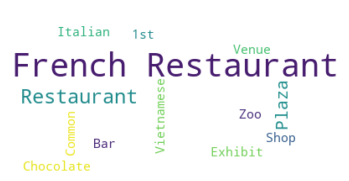

<Figure size 21600x14760 with 0 Axes>

In [101]:
# display the word cloud
plt.imshow(Paris_Venues, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(300)
fig.set_figheight(205)

plt.show()

The three most common venues in Paris are:

    1.French
    2.Restaurant
    3.Zoo

# Results and Discussion

The neighborhoods in London and Paris cluster model provides a label for each neighborhood which is representative of the cluster it belongs to. The cluster labels were then added to the dataframe. The results from the k-means clustering show that we can categorize the neighborhoods into 5 clusters based on the frequency of occurrence for both the cities individually.By analyzing these five clusters obtained for cities London and Paris, we can see that some of the clusters are more suited for restaurants, café, plaza, art museums and hotels. These clusters contain a higher degree of restaurants, hotels, multiplex, cafes, bars, other food joints and low degree other of venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few.


# Conclusion
In this project, I have gone through the process of identifying the business problems, specifying the data required, extracting and preparing the data, visualizing the results, performing machine learning by clustering the data into 5 clusters based on their frequency similarities, tackling and reaching to a definitive solution to business problems for both the cities London and Paris.

The purpose of this project was to explore the cities of London and Paris and see how attractive it is to potential tourists and migrants. We explored both the cities based on their postal codes and then extrapolated the common venues present in each of the neighborhoods finally concluding with clustering similar neighborhoods together.

London and Paris are both vibrant and cultural cities, with a fascinating history and incredible heritage. They are both world class cities and are similar in many ways, but very different in others. We could see that each of the neighborhoods in both the cities have a wide variety of experiences to offer which is unique. 

London and Paris seem to offer a vacation stay or ardent getaway with a lot of places to explore, beautiful landscapes, amazing food and a wide variety of culture. London has many venues to explore than Paris. When it comes to integrated transport network, London is best served with 6 international airports (2 in Paris) and almost twice as many bus lines and more overland train lines than Paris. Inclusively, it's up to the stakeholders, immigrants and globetrotters desire to decide which city is preferable more and according to their fondness and considering the factors determined in this project.


*Click on [Report Link](https://github.com/lavenya-mohan/coursera-capstone-project/blob/master/Report-%20Battle%20of%20Neighborhoods%20for%20London%20%26%20Paris.pdf) to view the report of this project.*

*Click on [Presentation Link](https://github.com/lavenya-mohan/coursera-capstone-project/blob/master/Battle%20Neighborhood%20Presentation%20Report.pdf) to view the presentation of this project*

<font color= lightblue>Thank You! Hope You Liked My Work, I'm Still Learning!</font>